# Numerical Problem

Consider a ring of matter of mass M and radius R. Calculate the gravitational potential energy at a point P located in the plane of the ring, at a distance r < R from its centre.

**a)** Show that the gravitational potential acting at the point *r* due to the ring of mass is given by:

$\phi = -\frac{GM}{R} (1+\frac{r^2}{4R^2}+...)$

Let r=radius of Earth's orbit=$1.496x10^{11}$m, R=radius of Jupiter's orbit=$7.784x10^{11}$m, M=mass of Jupiter=$1.90x10^{27}$kg. Assume average gravitational potential produced by Jupiter on Earth is contextually equivalent to the general case stated above.


**b)** Using this assumption and the values given in part (a), calculate a numerical value for the average gravitational potential that Jupiter exerts on Earth.

**c)** Use N point masses to represent the ring, such that $NM_i=M$. For a first approximation, let $N=2$ and $M_i=M/2$. Deploy at *R* and at opposite ends of the ring from one another. Caluclate potential. Repeat for N=4 evenly-spaced masses. Now increment by $(2^n)N$ for $(2^{-n})M_i$ until the potential is no more than 1 part in $10^4$ from the value determined in part b). What is N for this case?

**d)** Repeat c) for r'=(0,0.2,0.4,0.6,0.8)r. Plot $\mid\phi (r)-\phi (0)\mid$ versus *r*. Show the difference varies quadratically with *r* as predicted by equation from a).

In [1]:
%matplotlib inline
import numpy as np

# populate the interactive namespace with functions 
# from the module sympy

# to avoid a confusion with matplotlib functions
# that may have same names as sympy functions
# don't import numpy and matplotlib functions on this step

from sympy import *

# this command makes pretty looking formula printing
init_printing(pretty_print=True)

In [2]:
# define symbols that are going to be used
# in symbolic computations for real, integer, 
# and function objects
x, r, R, theta, mu, G, M, g = symbols('x r R theta mu G M g')
n = symbols('n', integer=True)
f, genfun, phi = symbols('f genfun phi', cls=Function)

**Part a)**

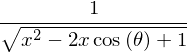

In [3]:
# define the integrand that here represents
# the so-called generating function of
# the Legendre polynomials
genfun = 1/sqrt(1+x**2-2*x*cos(theta))
genfun

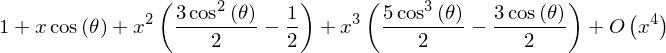

In [4]:
# expand it into a series in x=(R/r) < 1 up to its 3rd power
genfun.series(x,0,4)

The gravitational potential of the ring is


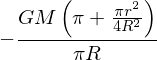

In [5]:
# get rid of the O symbol for the following computations
getfunc_trunc = (genfun.series(x,0,4)).removeO()

# collect all the coefficients in the above expansion
coeff = [getfunc_trunc.coeff(x,i).factor() for i in range(4)]

# integrate the truncated series expansion of
# the generating function in theta from 0 to pi
integral = integrate(getfunc_trunc, (theta,0,pi))

# substitute the integral in the expression for 
# the gravitatonal potential
phi = -2*mu*G*integral

# substitute mu expressed via M, R, and r in phi
f = phi.subs({mu:M/(2*pi*R),x:r/R})

print("The gravitational potential of the ring is")
f

**Part b)**

In [6]:
RJ = 7.784e11  # radius of Jupiter's orbit in m
MJ = 1.90e27   # Jupiter's mass in kg
GN = 6.674e-11 # Newton's gravitational constant in SI units
RE = 1.496e11  # radius of Earth's orbit in m

fJE = (f.subs({G:GN, M:MJ, R:RJ, x:(RJ/RE)}))
print ("The gravitational potential of Jupiter's ring",\
       "at Earth's orbit is",fJE,"SI units")

The gravitational potential of Jupiter's ring at Earth's orbit is -162905.960945529*(4.12604874256519e-25*pi*r**2 + pi)/pi SI units


**Part c)**

The expression we want to use is:

$$
\varphi (x) = -2\frac{GM_i}{R}\sum_{i=0}^{N/2}\frac{1}{\sqrt{1+x^2-2x\cos\alpha_i}},
$$

where $x = r/R$ and $\alpha_i = i\frac{\pi}{(N/2)}$ and $i = 0,1,\ldots,N/2$.

In [7]:
#Creating the first approximation to begin with

N=2
M=1 #kg
Mi=M/N
i=np.linspace(0,N/2)

expr=(1+x**2-2*x*np.cos(i*np.pi*2/N)) 
#Need to take a summation of this expression
#From i=0 to N/2 before plugging it into
#phi1 below

phi1 = -2*(G*Mi/R)*expr